In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import timedelta
from sklearn.metrics import mean_absolute_percentage_error



In [2]:
!git clone https://github.com/balrks/linear-poly-rice-model.git

Cloning into 'linear-poly-rice-model'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 47 (delta 16), reused 26 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 1.71 MiB | 5.06 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
df = pd.read_csv('/content/linear-poly-rice-model/data_harga_beras_2020_2024.csv')
df


,Date,Semua Provinsi,Aceh,Kota Lhokseumawe
0,2020-01-01,11800.0,10300.0,10000.0
1,2020-01-02,11800.0,10300.0,10000.0
2,2020-01-03,11850.0,10300.0,10000.0
3,2020-01-06,11800.0,10350.0,10000.0
4,2020-01-07,11800.0,10350.0,10000.0
...,...,...,...,...
1213,2024-08-26,15350.0,13900.0,13450.0
1214,2024-08-27,15350.0,13900.0,13450.0
1215,2024-08-28,15250.0,13900.0,13450.0
1216,2024-08-29,15300.0,13900.0,13450.0


In [ ]:
# Load the data from the CSV file
df = pd.read_csv('data_harga_beras_2020_2024.csv')

# Pastikan kolom 'Date' ada di data
df['Date'] = pd.to_datetime(df['Date'])

# Menyimpan tanggal minimum
start_date = df['Date'].min()

# Normalisasi kolom 'Date' dengan mengurangi tanggal minimum untuk mendapatkan hari sejak mulai
df['Date'] = (df['Date'] - start_date).dt.days

# Pilih kolom 'Date' dan 'Kota Lhokseumawe'
selected_columns = df[['Date', 'Kota Lhokseumawe']]

# Tampilkan hasila
print(selected_columns)

      Date  Kota Lhokseumawe
0        0           10000.0
1        1           10000.0
2        2           10000.0
3        5           10000.0
4        6           10000.0
...    ...               ...
1213  1699           13450.0
1214  1700           13450.0
1215  1701           13450.0
1216  1702           13450.0
1217  1703           13450.0

[1218 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1218 non-null   int64  
 1   Semua Provinsi    1218 non-null   float64
 2   Aceh              1218 non-null   float64
 3   Kota Lhokseumawe  1218 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 38.2 KB


In [ ]:
# Check missing values
df.isnull().sum()

Date                0
Semua Provinsi      0
Aceh                0
Kota Lhokseumawe    0
dtype: int64

In [ ]:
# # 6. Prepare data for regression
X = df['Date'].values.reshape(-1, 1)  # Independent variable
Y = df['Kota Lhokseumawe'].values     # Dependent variable

In [ ]:
# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Fit the Linear Regression model on the train data
linear = LinearRegression()
model_linear = linear.fit(X_train, Y_train)

# # # Print the coefficients and the intercept of the model
print('Nilai intercept (a): ',linear.intercept_)
print('Nilai slope (b): ',linear.coef_)

Nilai intercept (a):  8809.5292491385
Nilai slope (b):  [2.59081317]


In [ ]:
# Initialize PolynomialFeatures
poly = PolynomialFeatures()

X_train_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# Print the coefficients and the intercept
print('Nilai Intercept:', poly_model.intercept_)
print("Nilai slope:", poly_model.coef_)


Nilai Intercept: 9945.787846611
Nilai slope: [ 0.         -1.43787837  0.00236453]


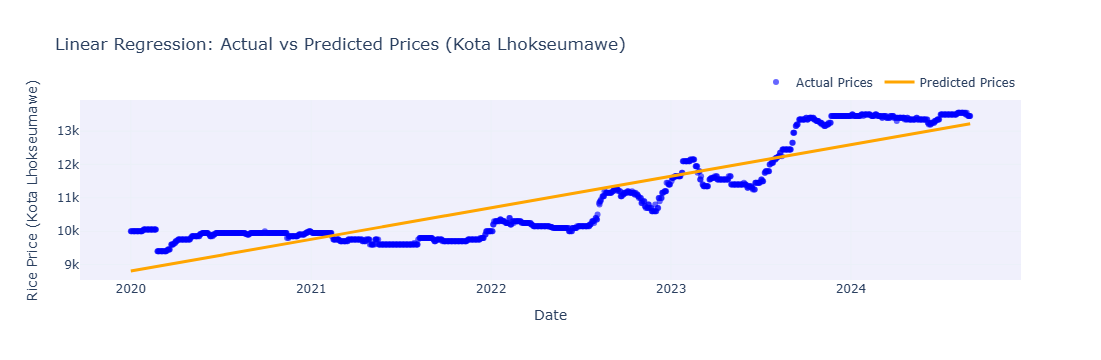

In [ ]:
# Tambahkan kolom prediksi ke dataset
df['Predicted Prices'] = model_linear.predict(df[['Date']].values)  # Pastikan hanya nilai numerik yang digunakan

# Buat grafik menggunakan Plotly
fig = go.Figure()

# Tambahkan data harga aktual
fig.add_trace(go.Scatter(
    x=pd.to_datetime(df['Date'], origin=start_date, unit='D'),  # Ubah kembali 'Date' ke format datetime
    y=df['Kota Lhokseumawe'],
    mode='markers',
    name='Actual Prices',
    marker=dict(color='blue', size=6, opacity=0.6)
))

# Tambahkan data harga prediksi
fig.add_trace(go.Scatter(
    x=pd.to_datetime(df['Date'], origin=start_date, unit='D'),  # Ubah kembali 'Date' ke format datetime
    y=df['Predicted Prices'],
    mode='lines',
    name='Predicted Prices',
    line=dict(color='orange', width=3)  # Garis regresi berwarna kuning
))

# Sesuaikan tata letak dengan latar belakang
fig.update_layout(
    title="Linear Regression: Actual vs Predicted Prices (Kota Lhokseumawe)",
    xaxis_title="Date",
    yaxis_title="Rice Price (Kota Lhokseumawe)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template="plotly_white",
    plot_bgcolor="rgba(230, 230, 250, 0.6)",  # Warna latar belakang dengan transparansi
)

# Tampilkan grafik
fig.show()


In [ ]:
# Konversi kembali 'Date' menjadi tanggal berdasarkan start_date
X_test_dates = pd.to_datetime(X_test, origin=start_date, unit='D')

# Gabungkan data X_test dan y_test untuk analisis data uji
testing_data = pd.DataFrame(X_test_dates, columns=['Date (X)'])  # Kolom 'Date' sekarang dalam format tanggal
testing_data['Harga Beras (Y)'] = Y_test  # Tambahkan harga aktual

# Tampilkan data testing
print(testing_data)



      Date (X)  Harga Beras (Y)
0   2022-01-27          10300.0
1   2020-12-29          10000.0
2   2020-03-02           9400.0
3   2023-11-13          13200.0
4   2022-03-29          10150.0
..         ...              ...
239 2021-08-11           9800.0
240 2020-12-07           9900.0
241 2020-03-24           9600.0
242 2024-02-12          13450.0
243 2020-03-30           9650.0

[244 rows x 2 columns]


In [ ]:
# Konversi kembali 'Date' menjadi tanggal berdasarkan start_date
X_test_dates = pd.to_datetime(X_test, origin=start_date, unit='D')

# Gabungkan data X_test dan y_test untuk analisis data uji
testing_data = pd.DataFrame(X_test_dates, columns=['Date (X)'])  # Kolom 'Date' sekarang dalam format tanggal
testing_data['Harga Beras (Y)'] = Y_test  # Tambahkan harga aktual
testing_data['Prediksi'] =model_linear.predict(X_test)

# Tampilkan data testing
print(testing_data)



      Date (X)  Harga Beras (Y)      Prediksi
0   2022-01-27          10300.0  10770.774821
1   2020-12-29          10000.0   9749.994431
2   2020-03-02           9400.0   8967.568853
3   2023-11-13          13200.0  12467.757449
4   2022-03-29          10150.0  10928.814424
..         ...              ...           ...
239 2021-08-11           9800.0  10332.927395
240 2020-12-07           9900.0   9692.996541
241 2020-03-24           9600.0   9024.566742
242 2024-02-12          13450.0  12703.521448
243 2020-03-30           9650.0   9040.111621

[244 rows x 3 columns]


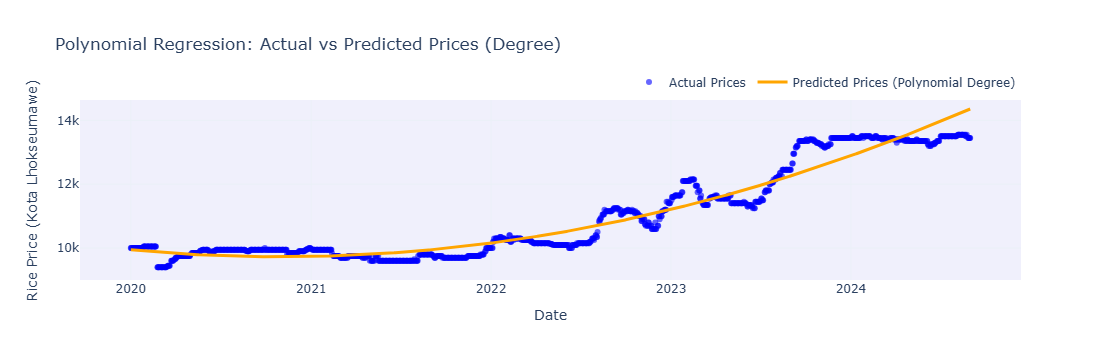

In [ ]:
# Prediksi untuk seluruh data
df['Predicted Prices'] = poly_model.predict(poly.transform(df[['Date']].values))

# Visualisasi hasil
fig = go.Figure()

# Tambahkan data harga aktual
fig.add_trace(go.Scatter(
    x=pd.to_datetime(df['Date'], origin=start_date, unit='D'),  # Ubah kembali 'Date' ke format datetime
    y=df['Kota Lhokseumawe'],
    mode='markers',
    name='Actual Prices',
    marker=dict(color='blue', size=6, opacity=0.6)
))

# Tambahkan data harga prediksi
fig.add_trace(go.Scatter(
    x=pd.to_datetime(df['Date'], origin=start_date, unit='D'),  # Ubah kembali 'Date' ke format datetime
    y=df['Predicted Prices'],
    mode='lines',
    name=f'Predicted Prices (Polynomial Degree)',
    line=dict(color='orange', width=3)  # Garis regresi berwarna kuning
))

# Sesuaikan tata letak dengan latar belakang
fig.update_layout(
    title=f"Polynomial Regression: Actual vs Predicted Prices (Degree)",
    xaxis_title="Date",
    yaxis_title="Rice Price (Kota Lhokseumawe)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template="plotly_white",
    plot_bgcolor="rgba(230, 230, 250, 0.6)"  # Warna latar belakang dengan transparansi
)

# Tampilkan grafik
fig.show()


In [ ]:
# Konversi kembali 'Date' menjadi tanggal berdasarkan start_date
X_test_dates = pd.to_datetime(X_test, origin=start_date, unit='D')

# Gabungkan data X_test dan y_test untuk analisis data uji
testing_data = pd.DataFrame(X_test_dates, columns=['Date (X)'])  # Kolom 'Date' sekarang dalam format tanggal
testing_data['Harga Beras (Y)'] = Y_test  # Tambahkan harga aktual

# Tampilkan data testing
print(testing_data)



      Date (X)  Harga Beras (Y)
0   2022-01-27          10300.0
1   2020-12-29          10000.0
2   2020-03-02           9400.0
3   2023-11-13          13200.0
4   2022-03-29          10150.0
..         ...              ...
239 2021-08-11           9800.0
240 2020-12-07           9900.0
241 2020-03-24           9600.0
242 2024-02-12          13450.0
243 2020-03-30           9650.0

[244 rows x 2 columns]


In [ ]:
# Konversi kembali 'Date' menjadi tanggal berdasarkan start_date
X_test_dates = pd.to_datetime(X_test, origin=start_date, unit='D')

X_test_poly = poly.transform(X_test)
# Lakukan prediksi
testing_data = pd.DataFrame(X_test_dates, columns=['Date (X)'])
testing_data['Harga Beras (Y)'] = Y_test
testing_data['Prediksi'] = poly_model.predict(X_test_poly)

# Tampilkan data testing
print(testing_data)



      Date (X)  Harga Beras (Y)      Prediksi
0   2022-01-27          10300.0  10212.306807
1   2020-12-29          10000.0   9735.410060
2   2020-03-02           9400.0   9866.875691
3   2023-11-13          13200.0  12629.775727
4   2022-03-29          10150.0  10351.768670
..         ...              ...           ...
239 2021-08-11           9800.0   9917.838231
240 2020-12-07           9900.0   9730.421507
241 2020-03-24           9600.0   9842.733205
242 2024-02-12          13450.0  13126.156462
243 2020-03-30           9650.0   9836.546133

[244 rows x 3 columns]
